In [ ]:
#KHAI BAO
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Activation,Dropout,Flatten
from keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import tensorflow as tf 

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_pre = x_test
y_ktr = y_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# ĐƯA GIÁ TRỊ VỀ TỪ 0-1
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu',
input_shape = (x_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()
model.compile(loss='mean_squared_error',optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size =256, epochs = 5500, validation_split = 0.2)
model.save('final_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

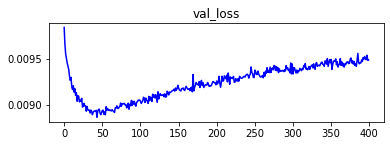

In [ ]:
plt.subplot(211)
plt.title('val_loss')
plt.plot(history.history['val_loss'], color='blue',
label='train')

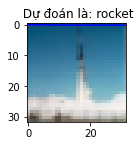

In [ ]:
#VE DO THI VAL-ACC
plt.subplot(212)
plt.title('Val Accuracy')
plt.plot(history.history['val_acc'], color='blue',
label='train')
test = 13
Label = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']
plt.title(" Dự đoán là: " +
str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,3072)))]))
plt.imshow(x_pre[test],cmap=plt.get_cmap('gray'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CIFAR100_ANN.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CIFAR100_ANN.ipynb to pdf
[NbConvertApp] Support files will be in CIFAR100_ANN_files/
[NbConvertApp] Making directory ./CIFAR100_ANN_files
[NbConvertApp] Making directory ./CIFAR100_ANN_files
[NbConvertApp] Writing 94324 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 65508 bytes to /content/drive/My Drive/CIFAR100_ANN.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'